# PROJET ANALYSE DE DONNEES
#### Etude des stations de location de vélos dans Paris

In [7]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

Les données suivants représentent le taux de disponibilité des vélos dans toutes les stations de Paris. Nous avons accés à cette valeur toutes les heures de chaque jour de la semaine sur la période du 2 septembre au 7 septembre 2014.

Plus le taux est proche de 1 plus la stations a de vélos disponibles. Inversement, quand ce taux est proche de 0 alors il y a de moins en moins de vélos libres dans la station.

## Présentation des données

Nous allons ici importer toutes les données mises à notre disposition.

In [8]:
loading = pd.read_csv('data/velibLoading.csv', sep = " ")

loading


,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
1,0.038462,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.107143,0.000000,...,0.296296,0.111111,0.111111,0.148148,0.307692,0.076923,0.115385,0.076923,0.153846,0.153846
2,0.478261,0.478261,0.478261,0.434783,0.434783,0.434783,0.434783,0.434783,0.260870,0.043478,...,0.043478,0.000000,0.217391,0.130435,0.045455,0.173913,0.173913,0.173913,0.260870,0.391304
3,0.218182,0.145455,0.127273,0.109091,0.109091,0.109091,0.090909,0.090909,0.054545,0.109091,...,0.259259,0.259259,0.203704,0.129630,0.148148,0.296296,0.314815,0.370370,0.370370,0.407407
4,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.904762,0.857143,0.857143,0.857143,0.761905,0.761905,0.761905,0.761905
5,0.927536,0.811594,0.739130,0.724638,0.724638,0.724638,0.724638,0.724638,0.753623,0.971014,...,0.227273,0.454545,0.590909,0.833333,1.000000,0.818182,0.636364,0.712121,0.621212,0.575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.090909,0.136364,0.000000,...,0.043478,0.173913,0.043478,0.086957,0.086957,0.304348,0.304348,0.130435,0.086957,0.086957
1186,0.200000,0.133333,0.155556,0.177778,0.177778,0.177778,0.200000,0.177778,0.288889,0.511111,...,0.266667,0.288889,0.155556,0.222222,0.333333,0.311111,0.355556,0.377778,0.333333,0.355556
1187,0.551724,0.517241,0.551724,0.517241,0.517241,0.551724,0.551724,0.448276,0.241379,0.034483,...,0.482759,0.310345,0.000000,0.000000,0.103448,0.379310,0.310345,0.310345,0.344828,0.482759
1188,0.476190,0.428571,0.428571,0.428571,0.428571,0.428571,0.476190,0.523810,0.428571,0.476190,...,0.880000,0.760000,0.750000,0.958333,1.000000,0.791667,0.791667,0.500000,0.434783,0.478261


Il y a 168 colonnes qui représentent le total des heures dans une semaine. Les 1189 lignes correspondent aux données de toutes les stations de Paris que nous étudions ici.

In [9]:
loading.describe()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,...,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,0.401503,0.408770,0.411718,0.415161,0.417136,0.421650,0.419860,0.415729,0.384658,0.326331,...,0.346147,0.325526,0.311334,0.306399,0.314730,0.334080,0.353493,0.385975,0.392552,0.397529
std,0.337079,0.335566,0.336132,0.337158,0.332237,0.326644,0.323422,0.319302,0.303621,0.314026,...,0.340516,0.339897,0.336863,0.331194,0.322904,0.317279,0.317572,0.328448,0.335061,0.341536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093750,0.093023,0.096774,0.100000,0.108696,0.114286,0.114286,0.117647,0.114286,0.047619,...,0.051282,0.041667,0.038462,0.043478,0.052632,0.071429,0.080000,0.095238,0.086957,0.090909
50%,0.312500,0.333333,0.342857,0.350000,0.357143,0.363636,0.360000,0.360000,0.320000,0.215385,...,0.204082,0.166667,0.151515,0.142857,0.172414,0.200000,0.238095,0.285714,0.292683,0.292683
75%,0.694444,0.705882,0.708333,0.710526,0.700000,0.700000,0.700000,0.687500,0.636364,0.575000,...,0.651163,0.608696,0.555556,0.550000,0.550000,0.558140,0.600000,0.666667,0.666667,0.692308
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Les 168 colonnes represéntent comme précedemment chaque heure d'une semaine. Les lignes correspondent à differentes données calculées sur toutes les stations chaque heure.

Nous allons maintenant importer les coordonnées géographiques de chaque stations. 

In [10]:
coord = pd.read_csv('./data/velibCoord.csv', sep = " ")

coord.head()

,longitude,latitude,bonus,names
1,2.377389,48.886300,0,EURYALE DEHAYNIN
2,2.317591,48.890020,0,LEMERCIER
3,2.330447,48.850297,0,MEZIERES RENNES
4,2.271396,48.833734,0,FARMAN
5,2.366897,48.845887,0,QUAI DE LA RAPEE


Grace à la commande ".head", nous avons affiché seulement les 5 premières lignes du tableau "coord".

## Analyse descriptive des données

Nous regardons dans cette cellule si certaines données sont manquantes, si certaines cases sont vides. 

In [11]:
print("Nombre de données manquantes dans 'loading':")
print(loading.isna().sum().sum())
print("Nombre de données manquantes dans 'coord':")
print(coord.isna().sum().sum())

Nombre de données manquantes dans 'loading':
0
Nombre de données manquantes dans 'coord':
0


Or ici, le résultat obtenu pour chaque tableau "loading" et "coord" est 0, il n'y a donc pas de donnée manquante ! 

In [12]:
loading_missing_value = loading.isna().sum().sort_values(ascending=False)

print("--- Somme des valeurs manquantes dans 'Loading' ---")
print(loading_missing_value.sum())

# --- #
print('')

coord_missing_value = coord.isna().sum().sort_values(ascending=False)

print("--- Somme des valeurs manquantes dans 'Coord' ---")
print(coord_missing_value)

--- Somme des valeurs manquantes dans 'Loading' ---
0

--- Somme des valeurs manquantes dans 'Coord' ---
longitude    0
latitude     0
bonus        0
names        0
dtype: int64


Nous affichons ici le nombre d'occurance de chaque station dans nos données.

In [13]:
station_name = coord.names.value_counts()
print(station_name)


 PORTE DES LILAS                 3
 GARE D'AUSTERLITZ               3
 PORTE DE BAGNOLET               2
 CHERCHE MIDI                    2
 LEGENDRE                        2
                                ..
 BEL AIR                         1
 ASSAS LUXEMBOURG                1
 COURS DE VINCENNES BD DAVOUT    1
 RUISSEAU ORDENER                1
 QUAI VOLTAIRE                   1
Name: names, Length: 1161, dtype: int64


On peut voir dans le tableau suivant que le nom de station qui apparait 3 fois correspond à des stations dont les coordonnées géographiques sont différentes.

In [14]:
name = station_name.index[0]
coord[coord.names == name]

,longitude,latitude,bonus,names
362,2.404770,48.876604,1,PORTE DES LILAS
450,2.405960,48.875412,1,PORTE DES LILAS
957,2.411046,48.878099,1,PORTE DES LILAS


Observons tout d'abord que les différentes moyennes des stations ne sont pas du tout homogène, et qu'il est donc, intéressant de regarder d'un peu plus près les différentes moyennes observées pour avoir une vision globale de l'impact des heures, jours et de la localisation des stations sur la comportement d'utilisation.

En effet, dans le graphe suivant, il est possible de voir que le taux de chargement moyen varie énormément.

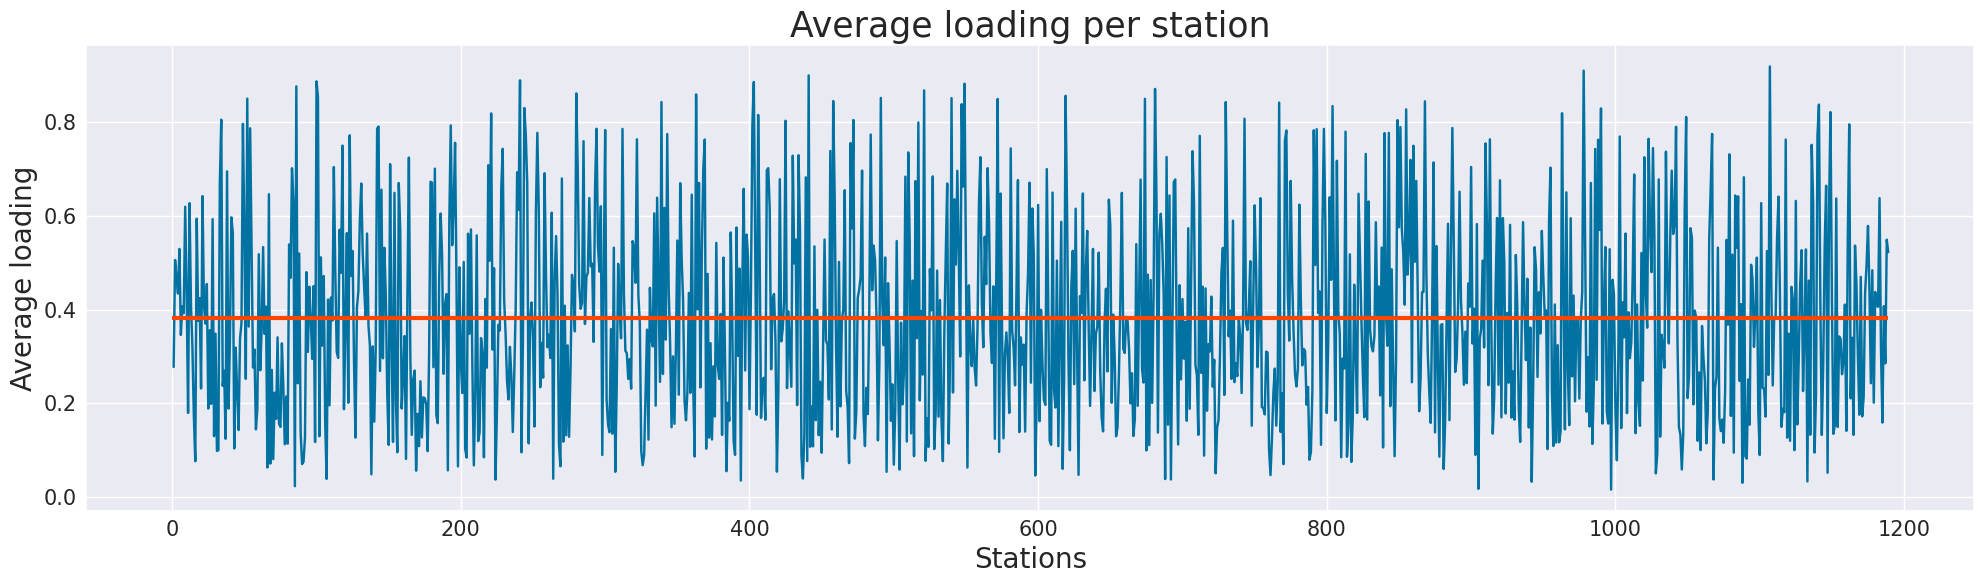

In [15]:
loading_mean = pd.Series(loading.mean(axis=1))
# %load solutions/Python/plot_mean_stations.py
n_stations = loading.shape[0]  # number of observed stations
stations   = np.arange(n_stations)

plt.figure(figsize = (20,6))

# --- #

plt.plot(loading_mean)
plt.hlines(y = loading.mean().mean(), xmin=0, xmax=n_stations, 
           colors = "OrangeRed", linewidth = 3)

# --- #

plt.xlabel('Stations', fontsize = 20)
plt.ylabel('Average loading', fontsize = 20)
plt.title("Average loading per station", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

Les moyennes : 
    - Moyenne par heure par jour 
    - Station la + utilisée par jour
    - Station la - utilisée par jour 
    - Station la + utilisée par semaine 
    - Station la - utilisée par semaine 
    - heure la plus creuse d'utilisation (ie le taux est proche de 1 car tous les vélos sont à la station)
    - heure la + fréquentée (ie le taux est proche de 0)
    - jour le + fréquenté

- Moyenne par heure par jour 

- Taux d'utilisation en moyenne sur l'ensemble des heures, jours et stations, nous donne une idée globale sur l'utilisation parisienne des vélib

On affiche dans le cadre suivant la moyenne de chargement totale sur toutes les stations au cours de la semaine.

In [16]:
print(loading.mean().mean())

0.3816217759807477


On cherche à déterminer maintenant la station la plus fréquentée, en moyenne par semaine.

In [17]:
mean=loading.mean(axis=1)
i = mean.idxmin()
print('Average fill rate :',mean[i])
print(coord.loc[i])

Average fill rate : 0.016132842025699153
longitude              2.427934
latitude              48.873929
bonus                         1
names         HORNET (BAGNOLET)
Name: 997, dtype: object


On cherche à déterminer maintenant la station la moins fréquentée, en moyenne par semaine.

In [18]:
mean=loading.mean(axis=1)
i = mean.idxmax()
print('Average fill rate :',mean[i])
print(coord.loc[i])

Average fill rate : 0.9193722943722953
longitude                          2.398262
latitude                           48.81466
bonus                                     0
names         INSURRECTION AOUT 1944 (IVRY)
Name: 1107, dtype: object


Le graphe suivant illustre le taux de chargement moyen dans tout Paris, sur la journée et pour chaque jour de la semaine.

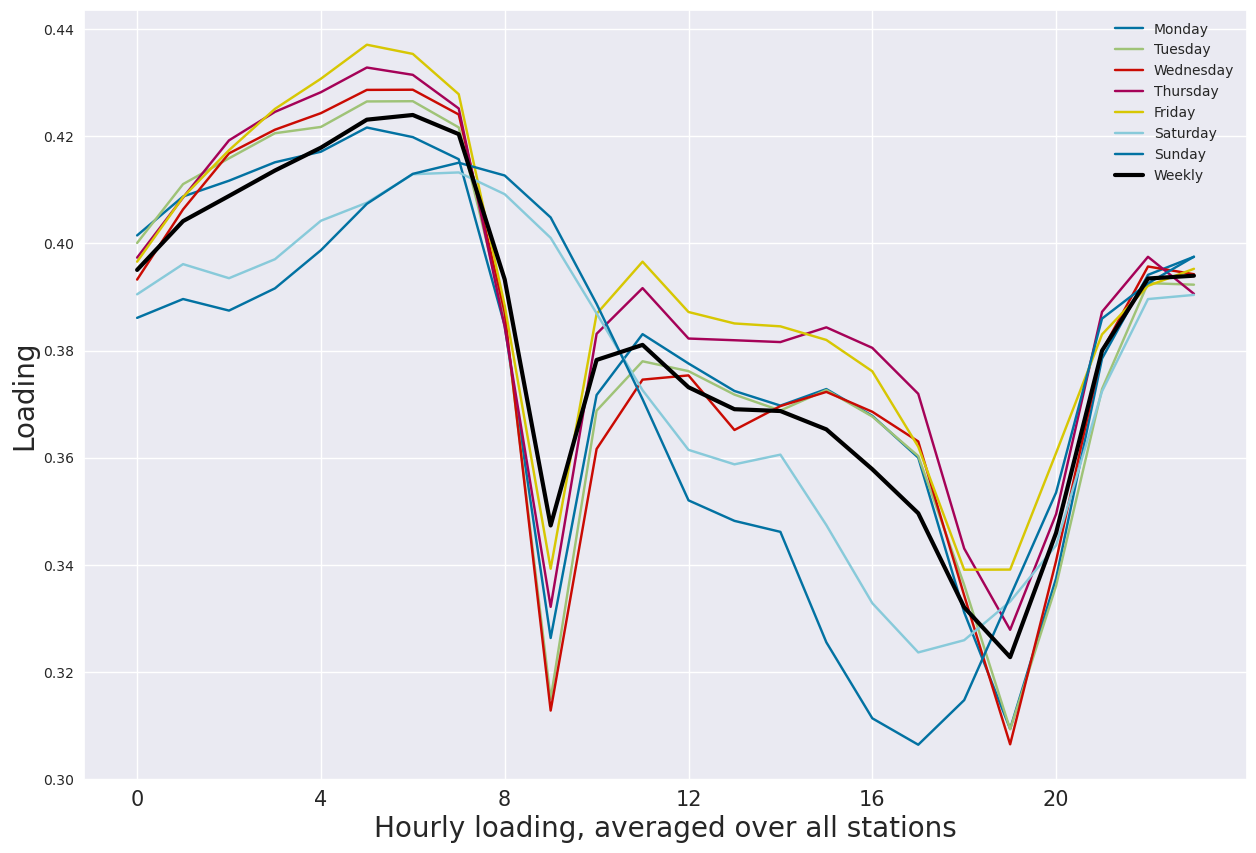

In [19]:
mean_per_hour_per_day = loading.mean(axis = 0).to_numpy()
mean_per_hour_per_day = mean_per_hour_per_day.reshape((7, 24))

mean_per_hour = mean_per_hour_per_day.mean(axis=0)

# --- #

days = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize = (15,10))

plt.plot(mean_per_hour_per_day.transpose())
plt.plot(mean_per_hour, color = "black", linewidth = 3)

plt.xlabel('Hourly loading, averaged over all stations', fontsize = 20)
plt.ylabel('Loading', fontsize = 20)
plt.legend(days + ['Weekly'])
plt.xticks(ticks = np.arange(0,24,4), labels=np.arange(0,24,4), fontsize = 15)
  
plt.tight_layout
plt.show()

#A faire !!!!
#recup la moyenne la plus basse par jour 
#np.min(mean_per_hour)

#recup la moyenne la plus haute par jour 
#mean_per_hour.idmax()

#Commentaire général: cela nous permet de connaître les heures d'influence globale de l'utilisation des vélos

On peut ainsi voir en moyenne, à quelle heure le taux est le plus haut et à quelle heure il est le plus bas. On déduit donc qu'aux alentours de 2h-4h du matin les vélos ne sont pas beaucoup empruntés. Cependant, on peut voir qu'à 9h environ les vélos sont davantage empruntés, idem entre 19h et 20h. Ce résultat s'explique par les heures de travail de la population qui part le matin en vélo et rentre en fin de journée. 

On souhaite savoir, en moyenne, quel est le jour de la semaine, durant lequel les gens utilisent le + les vélos 
=> il faut récupérer les différentes moyennes par jour et prendre la plus faible (ie le - de vélos à la station)

#Deux options:

#option1= 1:
days = ["Lun", "Mar", "Mer","Jeu", "Ven", "Sam", "Dim"]

for i in range(7):
    lundi = [c for c in loading.columns.tolist() if c.startswith(days[i])]
    loading[lundi].mean(axis=1)
    
# faire une liste avec les mots rep des colonnes puis les mettre dans une autre liste pour calculer la moyenne


#option 2:
cols_24 = loading.columns[:24]

# Calculer la moyenne des 24 premières colonnes pour chaque individu
mean_24 = df[cols_24].mean(axis=1)

## ACP 

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

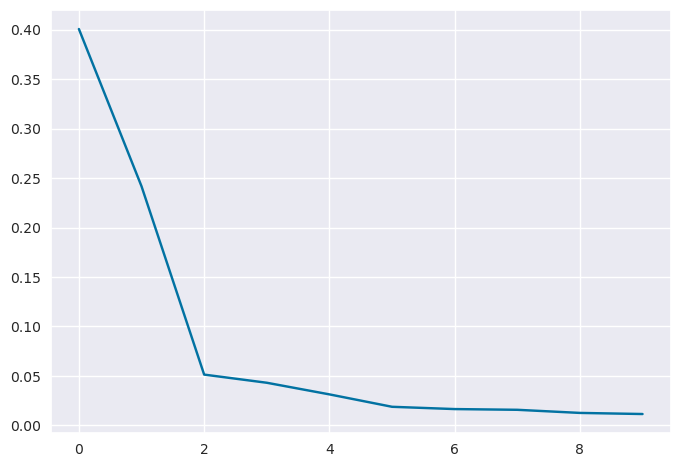

In [21]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(loading).transform(loading)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_[0:10])
plt.show()

In [22]:
sum=0
d=0
while sum<0.85:
    d=d+1
    pca=PCA(n_components=d)
    X=pca.fit_transform(loading)
    sum=np.sum(pca.explained_variance_ratio_)
print(sum)
print(d)

0.8531865828779686
11


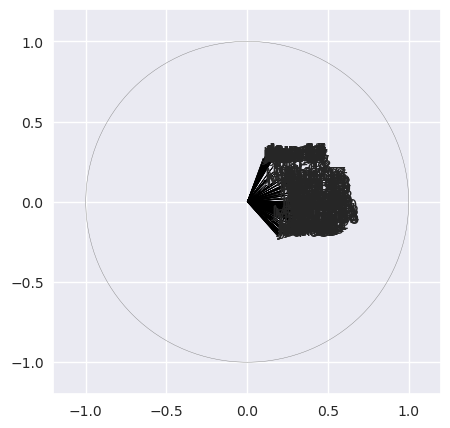

In [23]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, loading.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

In [26]:
import matplotlib.pyplot as plt

# Supposons que vous ayez déjà effectué PCA sur vos données et obtenu un objet PCA nommé pca
# X est votre jeu de données

# Entraînement de PCA sur les données
pca.fit(loading)

# Obtention des vecteurs propres (composantes principales)
eigenvectors = pca.components_

# Création d'un graphique biplot
plt.figure(figsize=(8, 8))
plt.scatter(pca[:, 0], X_pca[:, 1], alpha=0.6)  # Représentation des observations dans l'espace PCA

# Représentation des vecteurs propres
for i, (x, y) in enumerate(zip(eigenvectors[0, :], eigenvectors[1, :])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)  # Trace les vecteurs propres
    plt.text(x, y, f'Variable {i+1}', fontsize=12, ha='right', va='bottom', color='r')  # Ajoute le nom de la variable à chaque vecteur propre

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Biplot avec vecteurs propres')
plt.grid(True)
plt.show()

TypeError: 'PCA' object is not subscriptable

<Figure size 800x800 with 0 Axes>

[[ 0.08874636  0.08661756  0.08383318 ...  0.08703226  0.08966256
   0.09282493]
 [ 0.01017941  0.00025853 -0.00916801 ...  0.01754402  0.00854713
  -0.00190774]
 [-0.0178211  -0.04127693 -0.06351931 ...  0.04766054  0.04311115
   0.03235887]
 ...
 [ 0.08085902  0.07496797  0.07595207 ... -0.03240199 -0.03699963
  -0.02793312]
 [ 0.03589168  0.06690218  0.09565392 ... -0.08343833 -0.06514558
  -0.05910491]
 [-0.03344925 -0.04672584 -0.04436018 ...  0.06507639  0.06263422
   0.05279533]]


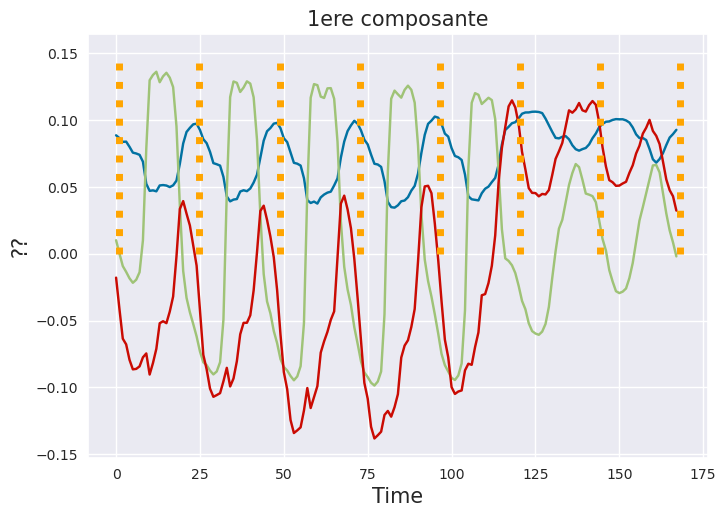

In [27]:
pca = PCA(n_components=11)
X=pca.fit_transform(loading)
eigenvectors = pca.components_
print(eigenvectors)
plt.plot(eigenvectors[0,:])
plt.plot(eigenvectors[1,:])
plt.plot(eigenvectors[2,:])
plt.xlabel('Time', fontsize = 15)
plt.ylabel('??', fontsize = 15)
plt.title("1ere composante", fontsize = 15)
time_tick  = np.linspace(1, 168, 8)
plt.vlines(x = time_tick, ymin = 0, ymax = 0.15, 
           colors = "Orange", linestyle = "dotted", linewidth = 5)

#A GARDER cf feuille de notes

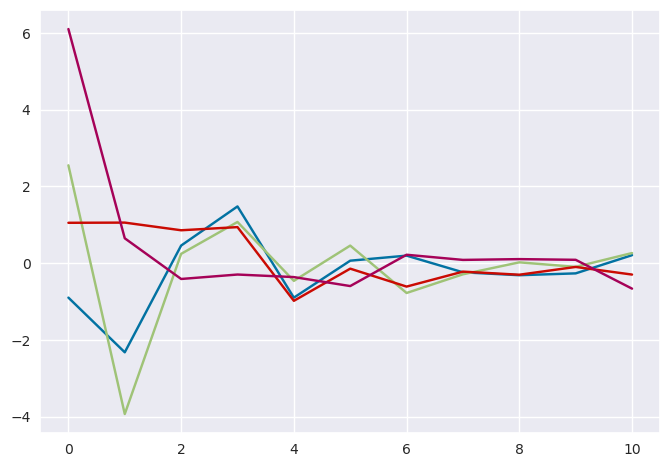

In [28]:
plt.plot(X[0,:])
plt.plot(X[1,:])
plt.plot(X[2,:])
plt.plot(X[100,:])
#projection du premier individu sur les différents vp, conclusion = trop dur à analyser

[[ 0.08874636  0.08661756  0.08383318 ...  0.08703226  0.08966256
   0.09282493]
 [ 0.01017941  0.00025853 -0.00916801 ...  0.01754402  0.00854713
  -0.00190774]
 [-0.0178211  -0.04127693 -0.06351931 ...  0.04766054  0.04311115
   0.03235887]
 ...
 [ 0.08085955  0.07496871  0.07595218 ... -0.0324003  -0.03699738
  -0.02793069]
 [ 0.03589845  0.06691165  0.09566111 ... -0.08343735 -0.06514478
  -0.05910219]
 [-0.03342861 -0.04670469 -0.04435244 ...  0.06512805  0.06270889
   0.05286403]]


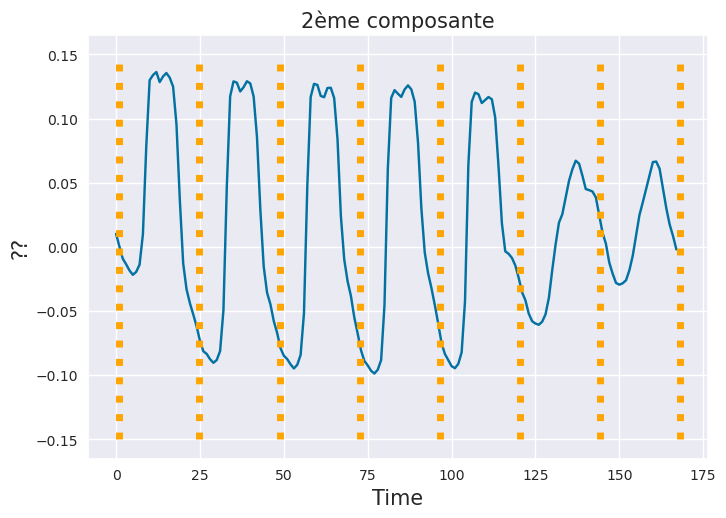

In [29]:
pca = PCA(n_components=11)
X=pca.fit_transform(loading)
eigenvectors = pca.components_
print(eigenvectors)
plt.plot(eigenvectors[1,:])
plt.xlabel('Time', fontsize = 15)
plt.ylabel('??', fontsize = 15)
plt.title("2ème composante", fontsize = 15)
time_tick  = np.linspace(1, 168, 8)
plt.vlines(x = time_tick, ymin = -0.15, ymax = 0.15, 
           colors = "Orange", linestyle = "dotted", linewidth = 5)

In [30]:
cols_24 = loading.columns[:24]

# Calculer la moyenne des 24 premières colonnes pour chaque individu
mean_24 = df[cols_24].mean(axis=1)

NameError: name 'df' is not defined

In [32]:
b =loading.mean(axis=0).to_numpy()
c = b.reshape((7,24))
#new_df = np.mean(loading.reshape(-1,7,24),axis=0).to_numpy()
#a = loading.mean(axis=1)
#a
c

array([[0.40150328, 0.40876993, 0.41171785, 0.41516116, 0.41713602,
        0.42164967, 0.41985969, 0.41572897, 0.38465817, 0.32633136,
        0.37170275, 0.38306746, 0.37758727, 0.3724563 , 0.3697226 ,
        0.37281092, 0.3678133 , 0.36001587, 0.3311071 , 0.30935224,
        0.33746816, 0.37850711, 0.39414101, 0.39751106],
       [0.40009465, 0.41108219, 0.41590276, 0.42058565, 0.42175927,
        0.42651959, 0.42656409, 0.4216678 , 0.38643534, 0.31495438,
        0.36877872, 0.37799893, 0.37615975, 0.3717774 , 0.36879868,
        0.37263372, 0.36768328, 0.3603098 , 0.33623941, 0.30927721,
        0.33606971, 0.37282221, 0.39258914, 0.39230608],
       [0.39325261, 0.40636764, 0.41682681, 0.42124435, 0.42433501,
        0.42867855, 0.42871012, 0.42407874, 0.38711518, 0.31277518,
        0.36162609, 0.37457342, 0.37536247, 0.36516917, 0.36963674,
        0.37228146, 0.36857462, 0.36302955, 0.33426371, 0.30647254,
        0.34073853, 0.37995416, 0.39569957, 0.39425874],
       [0.397

### ACP by TP methods

In [ ]:
# ACP sur toutes les données : 

In [63]:
from sklearn.decomposition import PCA

pca = PCA()
loading_pca = pca.fit_transform(loading)

on garde 11 composants pour le PCA


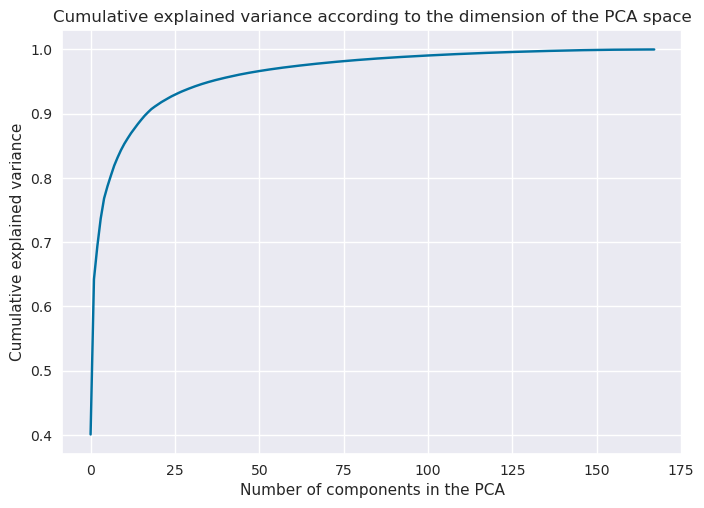

In [64]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');


#permet de connaître le nombre de variables à garder pour expliquer 90% de la variance 

#pca = PCA(0.90).fit(loading) 

pca = PCA(0.85).fit(loading) #pour savoir directement le nombre de composants nécessaire pour représenter une explication de 85% de la variance
pca.n_components_ #on affiche le nb de composants qu'on garde pour la PCA
print(f"on garde {pca.n_components_} composants pour le PCA")

In [65]:
#pca = PCA(n_components=18)
pca = PCA(n_components=11)

loading_pca = pca.fit_transform(loading) #même chose que fit puis transform dans notre cas à nous

print(100*pca.explained_variance_ratio_)


print('--- PCA ---')
print('Initial dimension:', loading.shape)
print('Dimension after projection:', loading_pca.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca.explained_variance_[0],2), 'i.e.', round(100*pca.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca.explained_variance_[1],2), 'i.e.', round(100*pca.explained_variance_ratio_[1],2), '% of the total variance')
print('Component 3:', round(pca.explained_variance_[2],2), 'i.e.', round(100*pca.explained_variance_ratio_[2],2), '% of the total variance')


[40.07166651 24.16919541  5.13413329  4.30937348  3.13423758  1.87940337
  1.6488254   1.57513215  1.26011259  1.14789137  0.98868756]
--- PCA ---
Initial dimension: (1189, 168)
Dimension after projection: (1189, 11)

--- Explained variance ---
Component 1: 7.98 i.e. 40.07 % of the total variance
Component 2: 4.81 i.e. 24.17 % of the total variance
Component 3: 1.02 i.e. 5.13 % of the total variance


On affiche l'histogramme de ce que chaque variable explique dans le modèle

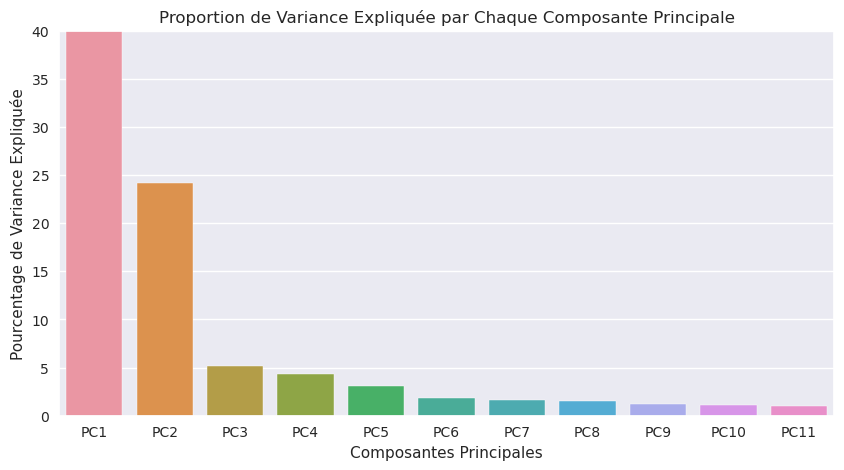

In [66]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 40)  # limiter l'axe y à la plage spécifiée
plt.show()

Représentation de la PCA : projection des données sur les axes des deux composantes principales :

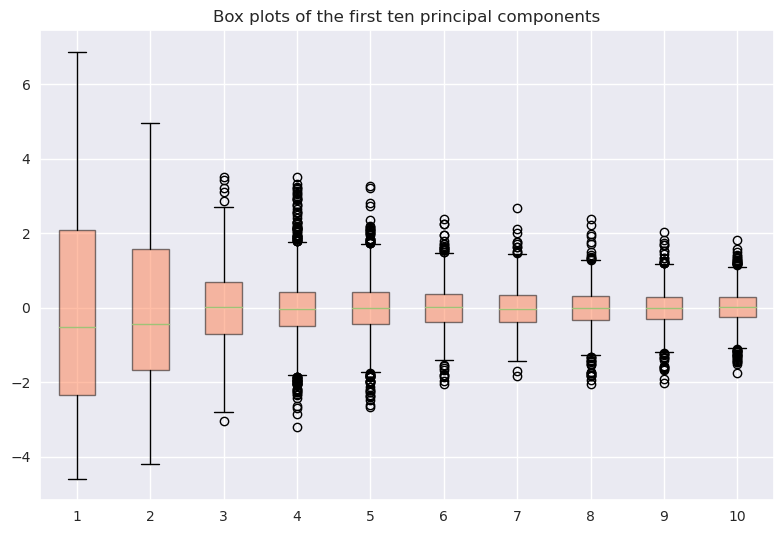

In [67]:
box = plt.boxplot(loading_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()

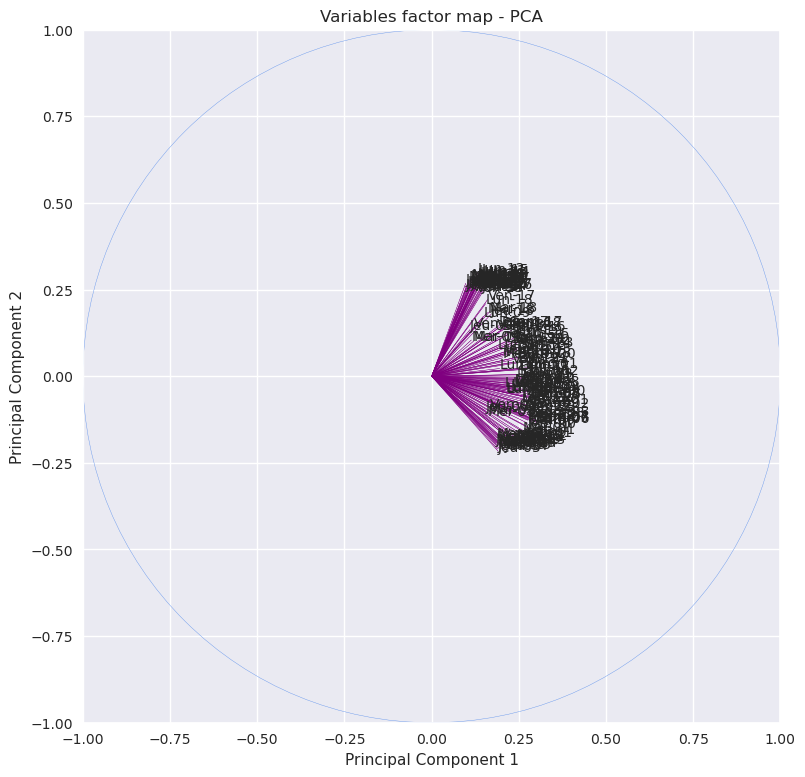

In [68]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, loading.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

In [ ]:
# ACP par jour

On regroupe les données par jour de la semaine afin de faire une ACP sur ces données déjà regrouper par jour. Donc on calcul la moyenne du taux pour le jour 1 ie lundi, de m^me pour tous les autres jours.

In [ ]:
# Calcul des moyennes pour chaque jour de la semaine
lundi = loading.iloc[:, list(range(0, 24))].mean(axis=1)
mardi = loading.iloc[:, list(range(24, 48))].mean(axis=1)
mercredi = loading.iloc[:, list(range(48, 72))].mean(axis=1)
jeudi = loading.iloc[:, list(range(72, 96))].mean(axis=1)
vendredi = loading.iloc[:, list(range(96, 120))].mean(axis=1)
samedi = loading.iloc[:, list(range(120, 144))].mean(axis=1)
dimanche = loading.iloc[:, list(range(144, 168))].mean(axis=1)

# Création du nouveau DataFrame
data_jours = pd.DataFrame({
    'lundi': lundi,
    'mardi': mardi,
    'mercredi': mercredi,
    'jeudi': jeudi,
    'vendredi': vendredi,
    'samedi': samedi,
    'dimanche': dimanche
})

print(data_jours)

In [ ]:
pca_2 = PCA()
data_jours_pca = pca_2.fit_transform(data_jours)

In [ ]:


plt.plot(np.cumsum(pca_2.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');


#permet de connaître le nombre de variables à garder pour expliquer 90% de la variance 

#pca = PCA(0.90).fit(loading) 

pca_2 = PCA(0.85).fit(data_jours) #pour savoir directement le nombre de composants nécessaire pour représenter une explication de 85% de la variance
pca_2.n_components_ #on affiche le nb de composants qu'on garde pour la PCA
print(f"on garde {pca_2.n_components_} composants pour le PCA")



In [ ]:
pca_2=PCA(n_components=2)
data_jours_pca = pca_2.fit_transform(data_jours) #même chose que fit puis transform dans notre cas à nous

print(100*pca_2.explained_variance_ratio_)


print('--- PCA ---')
print('Initial dimension:', data_jours.shape)
print('Dimension after projection:', data_jours_pca.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca_2.explained_variance_[0],2), 'i.e.', round(100*pca_2.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca_2.explained_variance_[1],2), 'i.e.', round(100*pca_2.explained_variance_ratio_[1],2), '% of the total variance')


In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca_2.explained_variance_ratio_))], y=pca_2.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 40)  # limiter l'axe y à la plage spécifiée
plt.show()

In [ ]:
box = plt.boxplot(data_jours_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()


In [ ]:


coord1 = pca.components_[0] * np.sqrt(pca_2.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca_2.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data_jours.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()



ACP nous dit donc que l'on peut ecpliquer les jours de la semaine avec deux variables au lieu de 7, pour expliquer + de 90% de la variance. Cependant comme pour l'ACP précédente les affichages sont pas jolis.

In [ ]:
# ACP par heure de la journée

In [ ]:
# Calcul des moyennes pour chaque heure de la journée
minuit_am = loading.iloc[:, [0, 24, 48, 72, 96, 120, 144]].mean(axis=1)
une_am = loading.iloc[:, [1, 25, 49, 73, 97, 121, 145]].mean(axis=1)
deux_am = loading.iloc[:, [2, 26, 50, 74, 98, 122, 146]].mean(axis=1)
trois_am = loading.iloc[:, [3, 27, 51, 75, 99, 123, 147]].mean(axis=1)
quatre_am = loading.iloc[:, [4, 28, 52, 76, 100, 124, 148]].mean(axis=1)
cinq_am = loading.iloc[:, [5, 29, 53, 77, 101, 125, 149]].mean(axis=1)
six_am = loading.iloc[:, [6, 30, 54, 78, 102, 126, 150]].mean(axis=1)
sept_am = loading.iloc[:, [7, 31, 55, 79, 103, 127, 151]].mean(axis=1)
huit_am = loading.iloc[:, [8, 32, 56, 80, 104, 128, 152]].mean(axis=1)
neuf_am = loading.iloc[:, [9, 33, 57, 81, 105, 129, 153]].mean(axis=1)
dix_am = loading.iloc[:, [10, 34, 58, 82, 106, 130, 154]].mean(axis=1)
onze_am = loading.iloc[:, [11, 35, 59, 83, 107, 131, 155]].mean(axis=1)
minuit_pm = loading.iloc[:, [12, 36, 60, 84, 108, 132, 156]].mean(axis=1)
une_pm = loading.iloc[:, [13, 37, 61, 85, 109, 133, 157]].mean(axis=1)
deux_pm = loading.iloc[:, [14, 38, 62, 86, 110, 134, 158]].mean(axis=1)
trois_pm = loading.iloc[:, [15, 39, 63, 87, 111, 135, 159]].mean(axis=1)
quatre_pm = loading.iloc[:, [16, 40, 64, 88, 112, 136, 160]].mean(axis=1)
cinq_pm = loading.iloc[:, [17, 41, 65, 89, 113, 137, 161]].mean(axis=1)
six_pm = loading.iloc[:, [18, 42, 66, 90, 114, 138, 162]].mean(axis=1)
sept_pm = loading.iloc[:, [19, 43, 67, 91, 115, 139, 163]].mean(axis=1)
huit_pm = loading.iloc[:, [20, 44, 68, 92, 116, 140, 164]].mean(axis=1)
neuf_pm = loading.iloc[:, [21, 45, 69, 93, 117, 141, 165]].mean(axis=1)
dix_pm = loading.iloc[:, [22, 46, 70, 94, 118, 142, 166]].mean(axis=1)
onze_pm = loading.iloc[:, [23, 47, 71, 95, 119, 143, 167]].mean(axis=1)

# Création du nouveau DataFrame
data_heures = pd.DataFrame({
    'Minuit': minuit_am,
    '1h': une_am,
    '2h': deux_am,
    '3h': trois_am,
    '4h': quatre_am,
    '5h': cinq_am,
    '6h': six_am,
    '7h': sept_am,
    '8h': huit_am,
    '9h': neuf_am,
    '10h': dix_am,
    '11h': onze_am,
    '12h': minuit_pm,
    '13h': une_pm,
    '14h': deux_pm,
    '15h': trois_pm,
    '16h': quatre_pm,
    '17h': cinq_pm,
    '18h': six_pm,
    '19h': sept_pm,
    '20h': huit_pm,
    '21h': neuf_pm,
    '22h': dix_pm,
    '23h': onze_pm
})

print(data_heures)

In [ ]:
pca_3 = PCA()
data_heures_pca = pca_3.fit_transform(data_heures)

In [ ]:
plt.plot(np.cumsum(pca_3.explained_variance_ratio_))

plt.title('Cumulative explained variance according to the dimension of the PCA space')
plt.xlabel('Number of components in the PCA')
plt.ylabel('Cumulative explained variance');


#permet de connaître le nombre de variables à garder pour expliquer 90% de la variance 

#pca = PCA(0.90).fit(loading) 

pca_3 = PCA(0.85).fit(data_heures) #pour savoir directement le nombre de composants nécessaire pour représenter une explication de 85% de la variance
pca_3.n_components_ #on affiche le nb de composants qu'on garde pour la PCA
print(f"on garde {pca_3.n_components_} composants pour le PCA")


In [ ]:
pca_3 = PCA(n_components = 2)
data_heures_pca = pca_3.fit_transform(data_heures) #même chose que fit puis transform dans notre cas à nous

print(100*pca_3.explained_variance_ratio_)


print('--- PCA ---')
print('Initial dimension:', data_jours.shape)
print('Dimension after projection:', data_jours_pca.shape)

print('')

print('--- Explained variance ---')
print('Component 1:', round(pca_3.explained_variance_[0],2), 'i.e.', round(100*pca_3.explained_variance_ratio_[0],2), '% of the total variance')
print('Component 2:', round(pca_3.explained_variance_[1],2), 'i.e.', round(100*pca_3.explained_variance_ratio_[1],2), '% of the total variance')


In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca_3.explained_variance_ratio_))], y=pca_3.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 40)  # limiter l'axe y à la plage spécifiée
plt.show()


In [ ]:
box = plt.boxplot(data_heures_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of the first ten principal components")
plt.tight_layout()
plt.show()

In [ ]:
coord1 = pca.components_[0] * np.sqrt(pca_3.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca_3.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data_heures.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

### Clustering with 𝑘-means

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import colors



from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

We will now try to find the optimal number of clusters

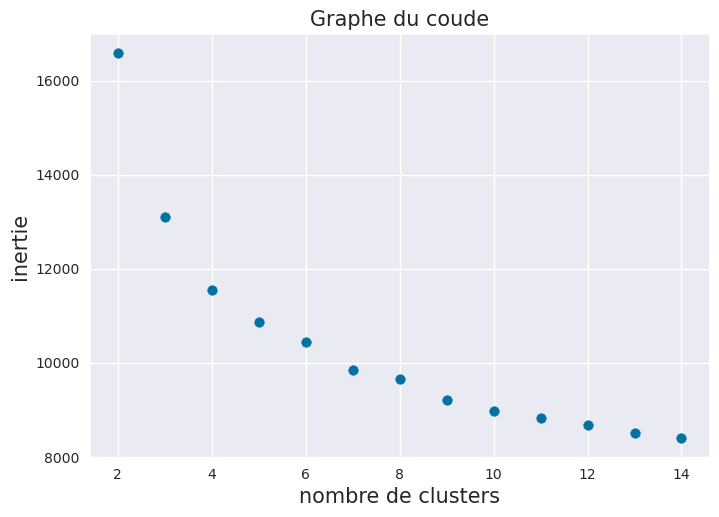

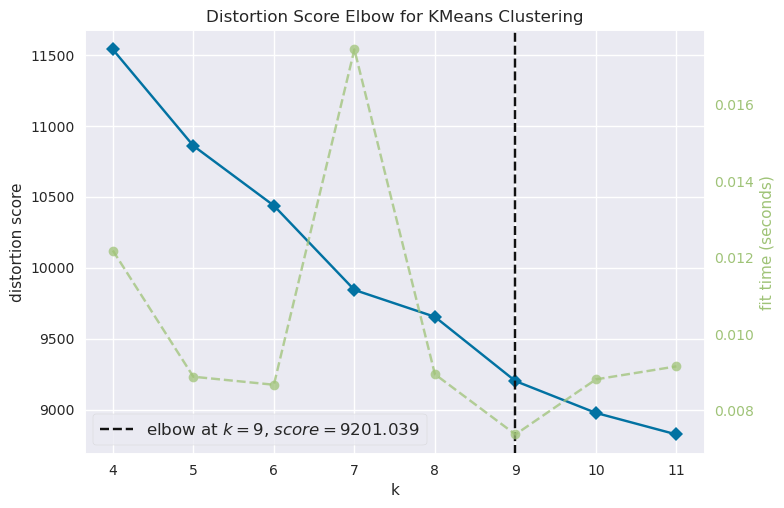

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans.fit(loading)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(4,12))

visualizer.fit(loading)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

Pour analyser ces graphes, on cherche le coude c'est à dire le moment où lorsqu'on va rajouter une composante il y aura la plus grande baisse d'inertie. Dans le premier graphe, on peut observer une différence de tendance entre 7-9. Pour le deuxième graphe, le coude est à 9.  

Nous allons maintenant utiliser la méthode "silhouette score" pour déterminer le nombre de cluster

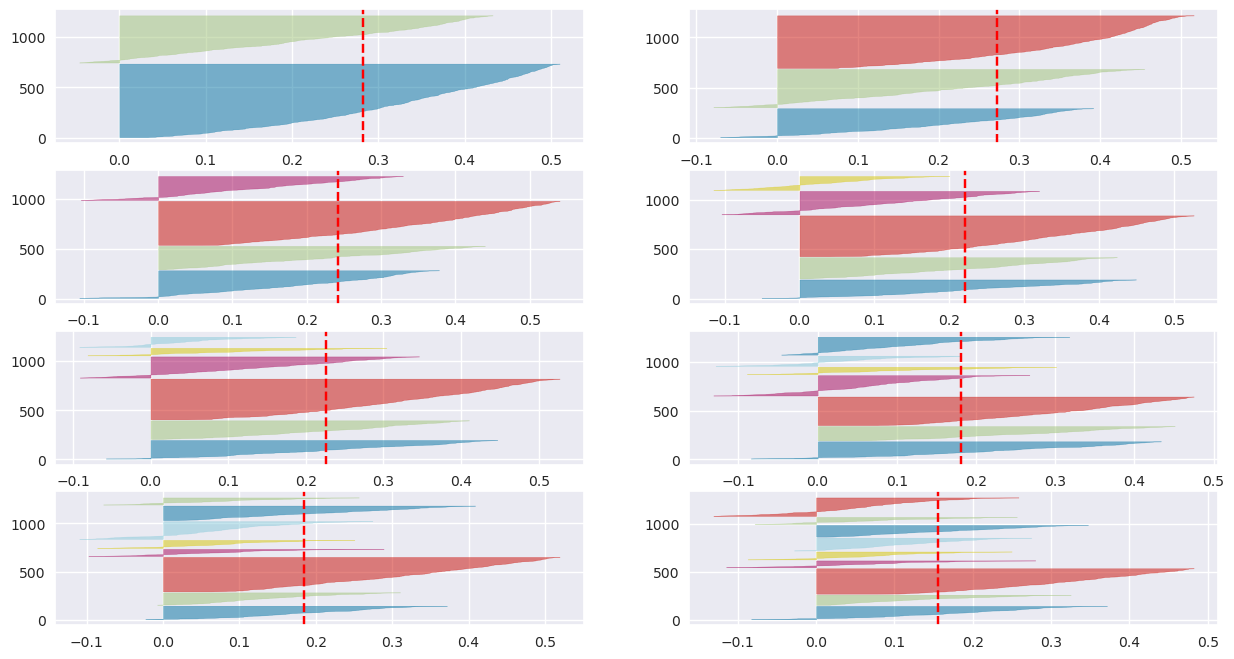

In [58]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(loading)

Pour choisir le nombre de clusters le plus adapté il faut trouver un équilibre entre plusieurs aspects. Tout d'abord, il faut que chaque pic dépassent le trait rouge, alors, les données sont adaptées au nombre de classes. Aussi, il faudrait dans l'idéal que chaque pic ait la même épaisseur. Enfin, il faut qu'il y ait le moins de valeurs négatives possibles, elles correspondent au nombre de variables mal classées.
Dans notre cas, il n'y a pas vraiment de situation idéale. Avec 2,3 ou 4 clusters le graphiques est plutôt bien mais il faudrait peut etre plus de clusters pour analyser le grand nombre de données que nous avons. Si on part sur 9 clusters (comme pour le graphe Elbow), le silhoutte score n'est pas parfait mais il est un bon compromis entre les aspects énoncés précedemment.

Ci-dessous on observe l'histogramme des classifications formées avec le nombre de clusters qui nous avons choisi (ici 9). 

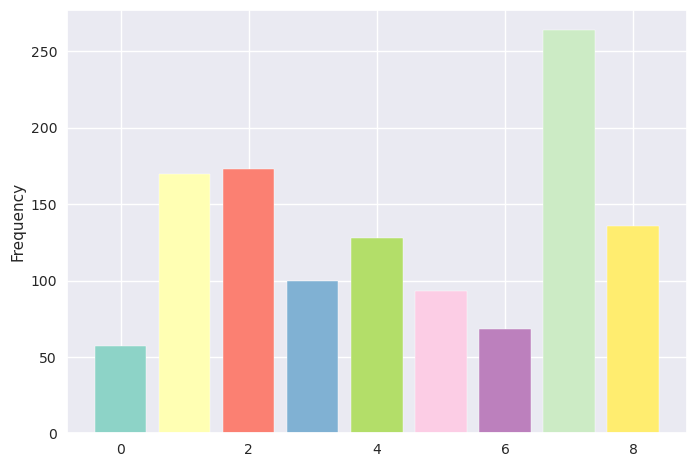

In [49]:
K = 9

kmeans = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters = kmeans.fit_predict(loading)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

On constate que les variables sont réparties de manière assez hétérogène. Beaucoup de variables se trouvent dans le cluster 7 et au contraire dans le cluster 0 il n'y en a pas beaucoup. Cependant, le nombre de variables est supérieur à 50 donc la répartition est raisonnable.


faire clustering sur loading_pca et comparer avec loading // sur classement par jour (toutes les données) puis modèle reduit // puis classement par heure (toutes les données) puis modèle réduitu